# Natural Language Processing
## Word2Vec

In [32]:
# Import necessary library
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import spacy
from collections import Counter
#import textwrap Not used anymore because I use nltk corpus instead.
import nltk
from nltk.corpus import brown

## 1. Find some corpus to use!

In [33]:
# Use corpus from nltk
# Amamda recommendation this!
from nltk.corpus import brown
nltk.download('brown')
corpus_sentence = nltk.corpus.brown.sents()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [46]:
# Actually, we have 57,340 senteces which is too much for my laptop too handle
# So, I will just cut it off to 2,500 senteces
print(len(corpus_sentence))
corpus_sentence = corpus_sentence[0:2500]
print(len(corpus_sentence))

# Let's change everything into the lowercase:
corpus_formated = [[word.lower() for word in sent] for sent in corpus_sentence] # Cool list comprehension trick!
print(corpus_formated[0:5])

2500
2500
[['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['the', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'city', 'executive', 'committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of', 'atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ['the', 'september-october', 'term', 'jury', 'had', 'been', 'charged', 'by', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'mayor-nominate', 'ivan', 'allen', 'jr.', '.'], ['``', 'only', 'a', 'relative', 'handful', 'of', 's

In [47]:
# Create word_list
word_list = list()
for sent in corpus_formated:
    for word in sent:
        word_list.append(word)

word_list[0:5]

['the', 'fulton', 'county', 'grand', 'jury']

In [48]:
# Get word sequences and unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus_formated))) # Unique set of word
print(vocab[0:5])
print(len(vocab))

['misled', 'pricing', 'went', 'base-runner', 'we']
8648


In [49]:
# Numericalize

# assign id to those vocabs
word2index = dict()
word2index.update({"<UNK>":  0})
for idx, v in enumerate(vocab):
        word2index.update({v:  idx + 1})

#add <UNK>, which is a very normal token exists in the world
vocab.append('<UNK>') #chaky, can it be ##UNK, or UNKKKKKK, or anything

# Testing
word2index['queen']

1681

In [50]:
# Checked if we position unknown token correctly
word2index

{'<UNK>': 0,
 'misled': 1,
 'pricing': 2,
 'went': 3,
 'base-runner': 4,
 'we': 5,
 'chester': 6,
 '1962': 7,
 'is': 8,
 'old': 9,
 'turkey': 10,
 'guidance': 11,
 'marc': 12,
 'frequently': 13,
 'professional': 14,
 '27-year-old': 15,
 'frank': 16,
 '1,065': 17,
 'institute': 18,
 'asdic': 19,
 'switch': 20,
 'agitating': 21,
 'manufacturing': 22,
 'tucson': 23,
 'fails': 24,
 'symington': 25,
 'receives': 26,
 'ball-carriers': 27,
 'decline': 28,
 '62-year-old': 29,
 'posters': 30,
 'decisions': 31,
 'army': 32,
 'principles': 33,
 'serving': 34,
 'incidentally': 35,
 'assemble': 36,
 'prominently': 37,
 'rebel': 38,
 'private-school': 39,
 "'52": 40,
 '250': 41,
 'macdonald': 42,
 'please': 43,
 'juvenile': 44,
 'proposals': 45,
 'bargaining': 46,
 "club's": 47,
 'refocusing': 48,
 'editing': 49,
 'merrill': 50,
 'depositors': 51,
 'pay': 52,
 'pearl': 53,
 'led': 54,
 'tripping': 55,
 'malmud': 56,
 'applause': 57,
 'imprudently': 58,
 'm': 59,
 '36th': 60,
 'texas': 61,
 'bernet':

In [51]:
# Create index2word dictionary
index2word = {v:k for k, v in word2index.items()}
index2word

{0: '<UNK>',
 1: 'misled',
 2: 'pricing',
 3: 'went',
 4: 'base-runner',
 5: 'we',
 6: 'chester',
 7: '1962',
 8: 'is',
 9: 'old',
 10: 'turkey',
 11: 'guidance',
 12: 'marc',
 13: 'frequently',
 14: 'professional',
 15: '27-year-old',
 16: 'frank',
 17: '1,065',
 18: 'institute',
 19: 'asdic',
 20: 'switch',
 21: 'agitating',
 22: 'manufacturing',
 23: 'tucson',
 24: 'fails',
 25: 'symington',
 26: 'receives',
 27: 'ball-carriers',
 28: 'decline',
 29: '62-year-old',
 30: 'posters',
 31: 'decisions',
 32: 'army',
 33: 'principles',
 34: 'serving',
 35: 'incidentally',
 36: 'assemble',
 37: 'prominently',
 38: 'rebel',
 39: 'private-school',
 40: "'52",
 41: '250',
 42: 'macdonald',
 43: 'please',
 44: 'juvenile',
 45: 'proposals',
 46: 'bargaining',
 47: "club's",
 48: 'refocusing',
 49: 'editing',
 50: 'merrill',
 51: 'depositors',
 52: 'pay',
 53: 'pearl',
 54: 'led',
 55: 'tripping',
 56: 'malmud',
 57: 'applause',
 58: 'imprudently',
 59: 'm',
 60: '36th',
 61: 'texas',
 62: 'bern

In [52]:
# Check vocab size
voc_size = len(vocab)
print(voc_size)

8649


## 2. Prepare train grand

In [53]:
def random_batch(batch_size, word_sequence, window_size=1):

# I fix a little from Chaky so we can modify the window_size
    
    # Make skip gram of one size window
    skip_grams = []
    # loop each word sequence
    # we starts from 1 because 0 has no context
    # we stop at second last for the same reason
    for sent in corpus_formated:
        for i in range(1, len(sent) - 1): # So we can modify the window size
            target = word2index[sent[i]]
            
            context = list()
            # ['a', 'b', 'c', 'd', 'e'] if window size = 2 and target is c
            # this is basically append 'b', 'd', 'a', 'e' into context
            
            for j in range(window_size):
                
                if i - (j + 1) >= 0: # Check if it outside of range from the left of list
                    context.append(word2index[sent[i - (j + 1)]])
                
                if i + (j + 1) < len(sent): # Check if it outside of range from the right of list
                    context.append(word2index[sent[i + (j + 1)]])
            
            #context = [word2index[sent[i - 1]], word2index[sent[i + 1]]]
            for w in context:
                skip_grams.append([target, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams[i][1]])  # context word, e.g., 3
            
    return np.array(random_inputs), np.array(random_labels)

### Testing the method

In [54]:
#testing the method
batch_size = 2 # mini-batch size
input_batch, target_batch = random_batch(batch_size, corpus_formated, 2)

print("Input: ", input_batch)
print("Target: ", target_batch)
#we will convert them to tensor during training, so don't worry...

Input:  [[5569]
 [6171]]
Target:  [[4884]
 [7105]]


## 3. Model

$$J(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{\substack{-m \leq j \leq m \\ j \neq 0}}\log P(w_{t+j} | w_t; \theta)$$

where $P(w_{t+j} | w_t; \theta) = $

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

where $o$ is the outside words and $c$ is the center word

In [55]:
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        all_embeds    = self.embedding_u(all_vocabs) #   [batch_size, voc_size, emb_size]
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, voc_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, voc_size, 1] = [batch_size, voc_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

In [56]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#use for the normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, len(vocab))  # [batch_size, voc_size]
all_vocabs.shape

torch.Size([2, 8649])

### Window_size = 1

In [57]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Skipgram(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [58]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#use for the normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, len(vocab))  # [batch_size, voc_size]
all_vocabs.shape

torch.Size([2, 8649])

In [59]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [60]:
import time

# Training
start_train_time = time.time()
num_epochs = 500
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch(batch_size, corpus_formated, window_size=2)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")
        start = time.time()
end_train_time = time.time()
train_time_mins, train_time_secs = epoch_time(start_train_time, end_train_time)
print(f'Total time use in skipgram with window size of 1 {train_time_mins} miniute(s) {train_time_secs} second')

Epoch: 100 | cost: 8.483469 | time: 0m 37s
Epoch: 200 | cost: 10.415653 | time: 0m 36s
Epoch: 300 | cost: 11.354008 | time: 0m 37s
Epoch: 400 | cost: 9.419911 | time: 0m 36s
Epoch: 500 | cost: 9.086571 | time: 0m 37s
Total time use in skipgram with window size of 1 3 miniute(s) 5 second


In [18]:
#let's write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

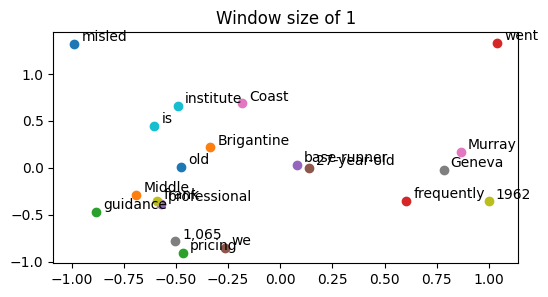

In [19]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Window size of 1')
plt.show()

### Cosine similarity of window size = 1

In [61]:
window1_institute = get_embed('institute')
window1_county = get_embed('county')
window1_grand = get_embed('grand')
window1_jury = get_embed('jury')

In [62]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

print(f"county vs. institute: ",        cos_sim(window1_county, window1_institute))
print(f"county vs. grand: ",       cos_sim(window1_county, window1_grand))
print(f"county vs. jury: ",          cos_sim(window1_county, window1_jury))

county vs. institute:  0.9970747981362627
county vs. grand:  0.6008029898860351
county vs. jury:  0.48603438566958557


### Window Size 2

In [63]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Skipgram(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [64]:
import time

# Training
start_train_time = time.time()
num_epochs = 500
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch(batch_size, corpus_formated, window_size=2)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")
        start = time.time()
end_train_time = time.time()
skipgram_train_time_mins, skipgram_train_time_secs = epoch_time(start_train_time, end_train_time)
print(f'Total time use in skipgram with window size of 2 {skipgram_train_time_mins} miniute(s) {skipgram_train_time_secs} second')



Epoch: 100 | cost: 7.306067 | time: 0m 36s
Epoch: 200 | cost: 8.540470 | time: 0m 36s
Epoch: 300 | cost: 8.302567 | time: 0m 36s
Epoch: 400 | cost: 8.673385 | time: 0m 36s
Epoch: 500 | cost: 9.877634 | time: 0m 36s
Total time use in skipgram with window size of 2 3 miniute(s) 2 second


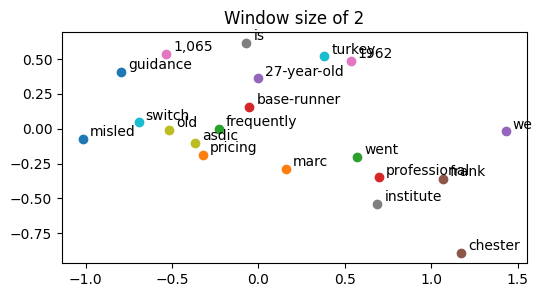

In [65]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Window size of 2')
plt.show()

### Cosine similarity of window size = 2

In [66]:
window2_institute = get_embed('institute')
window2_county = get_embed('county')
window2_grand = get_embed('grand')
window2_jury = get_embed('jury')
print(f'Window size of 1')
print(f"county vs. institute: ",        cos_sim(window1_county, window1_institute))
print(f"county vs. grand: ",       cos_sim(window1_county, window1_grand))
print(f"county vs. jury: ",     cos_sim(window1_county, window1_jury))
print(f'Window size of 2')
print(f"county vs. institute: ",        cos_sim(window2_county, window2_institute))
print(f"county vs. grand: ",       cos_sim(window2_county, window2_grand))
print(f"county vs. jury: ",     cos_sim(window2_county, window2_jury))

Window size of 1
county vs. institute:  0.9970747981362627
county vs. grand:  0.6008029898860351
county vs. jury:  0.48603438566958557
Window size of 2
county vs. institute:  0.40772544241328657
county vs. grand:  0.45798486169871233
county vs. jury:  0.9986513750518401


### CBOW

In [92]:
# Random batch for cbow

def random_batch_cbow(batch_size, word_sequence, window_size=1):

    cbow = []

    for sent in corpus_formated:
        for i in range(1, len(sent) - 1): # So we can modify the window size
            target = word2index[sent[i]]
            context = list()
            
            for j in range(window_size):
                
                if i - (j + 1) >= 0: # Check if it outside of range from the left of list
                    context.append(word2index[sent[i - (j + 1)]])
                
                if i + (j + 1) < len(sent): # Check if it outside of range from the right of list
                    context.append(word2index[sent[i + (j + 1)]])
            
            # This part is different from skipgram
            # Now we use all context as input and target as label
            for w in context:
                cbow.append([context, target])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False) #randomly pick without replacement
    
    for i in random_index:
        random_inputs.append(cbow[i][0])  # Context word that we want as input
        random_labels.append([cbow[i][1]])  # Target word that we want as label
    
    return np.array(random_inputs), np.array(random_labels)

In [93]:
#testing the method
batch_size = 2 # mini-batch size
input_batch, target_batch = random_batch_cbow(batch_size, corpus_formated, 2)

print("Input: ", input_batch)
print("Target: ", target_batch)
#we will convert them to tensor during training, so don't worry...

Input:  [[8106 5125    5 3218]
 [3290 8056 3218 3295]]
Target:  [[2046]
 [2492]]


In [96]:
class Cbow(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Cbow,self).__init__() # Not sure why we super(Cbow) or super(Skipgram)?
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        all_embeds    = self.embedding_u(all_vocabs) #   [batch_size, voc_size, emb_size]
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, voc_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, voc_size, 1] = [batch_size, voc_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

In [97]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Cbow(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [99]:
# Training
import time
num_epochs = 500
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_cbow(batch_size, corpus_formated, 1)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")
        start = time.time()


Epoch: 100 | cost: 8.891635 | time: 0m 26s
Epoch: 200 | cost: 8.876501 | time: 0m 26s
Epoch: 300 | cost: 9.623747 | time: 0m 26s
Epoch: 400 | cost: 8.718929 | time: 0m 26s
Epoch: 500 | cost: 8.925336 | time: 0m 26s


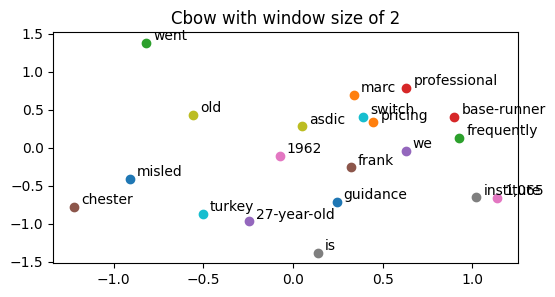

In [100]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Cbow with window size of 2')
plt.show()

### Cbow cosine similarity

In [101]:
cbow_institute = get_embed('institute')
cbow_county = get_embed('county')
cbow_grand = get_embed('grand')
cbow_jury = get_embed('jury')
print(f'Window size of 1')
print(f"county vs. institute: ",        cos_sim(cbow_county, cbow_institute))
print(f"county vs. grand: ",       cos_sim(cbow_county, cbow_grand))
print(f"county vs. jury: ",     cos_sim(cbow_county, cbow_jury))

Window size of 1
county vs. institute:  -0.8370008727539522
county vs. grand:  -0.4852441758003172
county vs. jury:  -0.08159743379364603


## Word2Vec with Negative Sampling

### Unigram distribution

$$P(w)=U(w)^{3/4}/Z$$

In [102]:
Z = 0.001

In [103]:
from collections import Counter

word_count = Counter(flatten(corpus_formated))
num_total_words = sum([c for w, c in word_count.items()])

In [104]:
# Check if the counting work
word_count['county'], num_total_words

(47, 53803)

In [105]:
# Create unigram table
unigram_table = []

for vo in vocab:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

In [106]:
Counter(unigram_table)

Counter({'went': 2,
         'we': 5,
         'is': 22,
         'old': 2,
         'professional': 1,
         'frank': 1,
         'institute': 1,
         'army': 1,
         'juvenile': 1,
         'pay': 2,
         'led': 1,
         'texas': 4,
         'changes': 1,
         'last': 9,
         'opposition': 1,
         'louis': 1,
         'political': 2,
         'bond': 1,
         'form': 1,
         'away': 1,
         'weekend': 1,
         'most': 4,
         'green': 1,
         'facilities': 1,
         '?': 3,
         'cut': 1,
         'miles': 1,
         'o.': 1,
         'w.': 3,
         'cases': 2,
         'spending': 1,
         '23': 1,
         'entire': 1,
         'friday': 3,
         'baker': 1,
         'games': 2,
         'planned': 1,
         'whom': 1,
         'better': 1,
         'choice': 1,
         'barber': 1,
         'part': 2,
         'kansas': 1,
         'vice': 1,
         'teaching': 1,
         'find': 1,
         'higher': 1,
   

### Negative Sampling

In [107]:
import random

# Does the same thing as above.
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

# Pick values from the table that we create before.
def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

In [108]:
# Just testing if it work
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

In [109]:
target_batch.shape

torch.Size([2, 1])

In [110]:
num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

#{'grapes': 0, 'apple': 1, 'animal': 2, 'cat': 3, 'ice': 4, 'orange': 5, 'dog': 6, 'monkey': 7, 'conda': 8, 'fruit': 9, 'banana': 10}

tensor([[4918, 7665,  300],
        [3300,  222, 6866]])

In [111]:
target_batch[1]

tensor([2588])

### Model

In [112]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = torch.sum(neg_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2), 1).view(neg_embeds.size(0), -1) # BxK -> Bx1
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1] = [batch_size, k] ==sum==> [batch_size, 1]
        
        # This is what had been changed from the normal one.
        loss = self.logsigmoid(positive_score) + self.logsigmoid(negative_score)
        
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)
        
        return embeds

In [113]:
# Initialize parameter
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = SkipgramNegSampling(voc_size, embedding_size)
num_neg        = 10 # num of negative sampling

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [156]:
import time

start_train_time = time.time()

# Training
num_epochs = 500
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus_formated, 1)

    # Neat trick to avoid nd.array object (This is bad practice!)
    input_batch = list(input_batch)

    # Padding since we do not cut the sentence so, It will not be in the same shape sometimes.
    lenght_batch0 = len(input_batch[0])
    lenght_batch1 = len(input_batch[1])
    pad_num = np.abs(lenght_batch0 - lenght_batch1)

    # pad the zero dimension
    if lenght_batch0 < lenght_batch1:
        input_batch[0].extend(list(np.full((pad_num, ), 0))) # Padding with zero
    # pad the first dimension
    elif lenght_batch0 > lenght_batch1:
        input_batch[1].extend(list(np.full((pad_num, ), 0)))

    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
        
    loss = model(input_batch, target_batch, negs_batch)
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

end_train_time = time.time()
neg_train_time_mins, neg_train_time_secs = epoch_time(start_train_time, end_train_time)
print(f'Total time use in negative sampling {neg_train_time_mins} miniute(s) {neg_train_time_secs} second')


/tmp/ipykernel_18709/2212126752.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(random_inputs), np.array(random_labels)
/tmp/ipykernel_18709/809596013.py:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  input_batch = torch.LongTensor(input_batch)


Epoch: 100 | cost: 1.811861 | time: 0m 0s
Epoch: 200 | cost: 3.350780 | time: 0m 0s
Epoch: 300 | cost: 2.939404 | time: 0m 0s
Epoch: 400 | cost: 2.245315 | time: 0m 0s
Epoch: 500 | cost: 2.162465 | time: 0m 0s
Total time use in negative sampling 2 miniute(s) 58 second


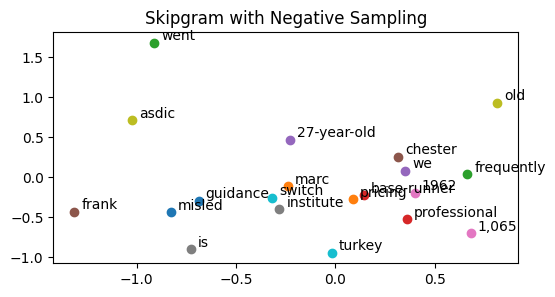

In [157]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Skipgram with Negative Sampling')
plt.show()

### Comparing with normal skipgram

In [158]:
skipgram_neg_institute = get_embed('institute')
skipgram_neg_county = get_embed('county')
skipgram_neg_grand = get_embed('grand')
skipgram_neg_jury = get_embed('jury')

print(f'Skipgram with Window size of 2')
print(f"county vs. institute: ",        cos_sim(window2_county, window2_institute))
print(f"county vs. grand: ",       cos_sim(window2_county, window2_grand))
print(f"county vs. jury: ",     cos_sim(window2_county, window2_jury))
print(f'Total time use in skipgram {skipgram_train_time_mins} miniute(s) {skipgram_train_time_secs} second')

print(f'Skipgram with neg sam with Window size of 2')
print(f"county vs. institute: ",        cos_sim(skipgram_neg_county, skipgram_neg_institute))
print(f"county vs. grand: ",       cos_sim(skipgram_neg_county, skipgram_neg_grand))
print(f"county vs. jury: ",     cos_sim(skipgram_neg_county, skipgram_neg_jury))
print(f'Total time use in negative sampling {neg_train_time_mins} miniute(s) {neg_train_time_secs} second')

Skipgram with Window size of 2
county vs. institute:  0.40772544241328657
county vs. grand:  0.45798486169871233
county vs. jury:  0.9986513750518401
Total time use in skipgram 3 miniute(s) 2 second
Skipgram with neg sam with Window size of 2
county vs. institute:  0.40186464565033564
county vs. grand:  0.9985803259493625
county vs. jury:  0.8891463070288139
Total time use in negative sampling 2 miniute(s) 58 second
